In [1]:
from PIL import Image
import random
import math
import numpy as np
import cv2 
from matplotlib import pyplot as plt 
import os
from matplotlib.pyplot import imshow
from math import log

In [2]:
#2-D Duffing map



im = Image.open("Downloads/img/HorizonZero.png")  # Can be many different formats.
pix = im.load()
m= im.size[0]

In [3]:
x1=-0.04
y1=0.2

savex1=[]
savey1=[]


for i in range(m*m*8):
        #Henon Map formula
    xN = y1
    yN = -0.2*x1 + 2.75*y1 - (y1*y1*y1)
    

        # New x = xN and y = yN
    x1 = xN
    y1 = yN
    
    savex1.append(x1)
    savey1.append(y1)
    
  
    
  

In [4]:
x2=0.23
y2=-0.13

savex2=[]
savey2=[]


for i in range(m*m*8):
        #Henon Map formula
    xN = y2
    yN = -0.2*x2 + 2.75*y2 - (y2*y2*y2)
    

        # New x = xN and y = yN
    x2 = xN
    y2 = yN
    
    savex2.append(x2)
    savey2.append(y2)
    

In [5]:
#FINAL X and Y
h1=[]

for i in range(m*m*8):
    if(savex2[i]>savex1[i]):
        h1.append(1)
    else:
        h1.append(0)
        
h2=[]

for i in range(m*m*8):
    if(savey2[i]<savey1[i]):
        h2.append(1)
    else:
        h2.append(0)
        
        
len(h2)

500000

In [6]:
#XORing the secret images generated:

def returningbinarytuples(p):
    binary=[]
    for i in range(8):
        binary.append(int(p%2))
        p=(p-(p%2))/2
        
    binaryreal=[0,0,0,0,0,0,0,0]

    for i in range(8):
        binaryreal[7-i]=binary[i]
    return binaryreal

def dec(bitSequence):
    decimal = 0
    for bit in bitSequence:
        decimal = decimal * 2 + bit
    return decimal

In [7]:
image_matrix = []
for width in range(m):
    row = []
    for height in range(m):
        try:
            row.append((pix[width,height]))
        except:
            row=[pix[width, height]]
    try:
        image_matrix.append(row)
    except:
        image_matrix = [row]
        
img2=image_matrix

In [8]:
#img2 = image_matrix

#for j in range(20):
 #   for x in range(m):
  #      for y in range(m):

   #         img2[x][y] = image_matrix[(x+y)%m][(x+2*y)%m]

In [9]:
#RED PLANE

imagebitwise=[]

for i in range(m):
    for j in range(m):
        queen=returningbinarytuples(img2[i][j][0])
        for k in range (8):
            imagebitwise.append(queen[k])
            
r=[]

for i in range (m*m*8):
    r.append(imagebitwise[i]^h1[i]^h2[i])
len(r)


# GREEN PLANE X
imagebitwise=[]

for i in range(m):
    for j in range(m):
        queen=returningbinarytuples(img2[i][j][1])
        for k in range (8):
            imagebitwise.append(queen[k])
            
g=[]

for i in range (m*m*8):
    g.append(imagebitwise[i]^h1[i]^h2[i])
len(g)


#BLUE PLANE X

imagebitwise=[]

for i in range(m):
    for j in range(m):
        queen=returningbinarytuples(img2[i][j][1])
        for k in range (8):
            imagebitwise.append(queen[k])
            
b=[]

for i in range (m*m*8):
    b.append(imagebitwise[i]^h1[i]^h2[i])

len(b)

500000

In [10]:
r=np.reshape(r,(m*m,8))
g=np.reshape(g,(m*m,8))
b=np.reshape(b,(m*m,8))

In [11]:
encrypted1=[]
encryprow=[]
for i in range(1,(m*m)+1):
    try:
        r1=dec(r[i-1])
        g1=dec(g[i-1])
        b1=dec(b[i-1])
        encryprow.append((r1,g1,b1))
        if(i%m==0):
            encrypted1.append(encryprow)
            encryprow=[]
        
    except:
       ;
        


In [12]:
len(encrypted1)

250

In [13]:
im5 = Image.new("L", (m, m))
rgb_im = im5.convert('RGBA')
pix = rgb_im.load()

for x in range(m):
    for y in range(m):
        pix[x, y] = img2[x][y]
rgb_im.save("Downloads/img/duffingencrypted1.bmp", "BMP")

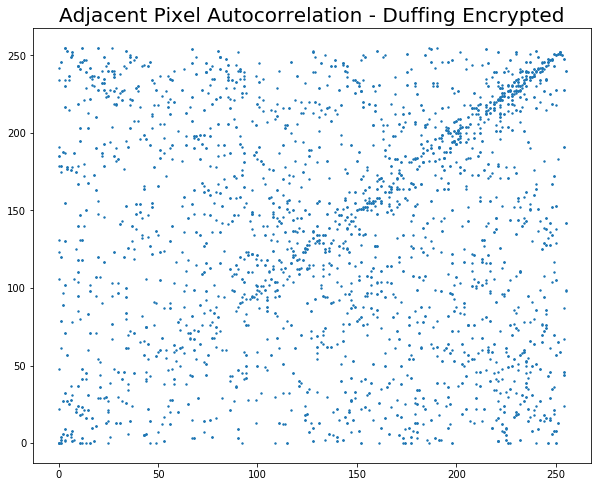

In [14]:
samples_x = []
samples_y = []
for i in range(1024):
    x = random.randint(0,m-2)
    y = random.randint(0,m-1)
    samples_x.append(encrypted1[x][y])
    samples_y.append(encrypted1[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Duffing Encrypted', fontsize=20)
plt.show()

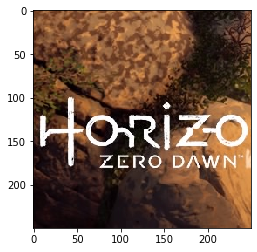

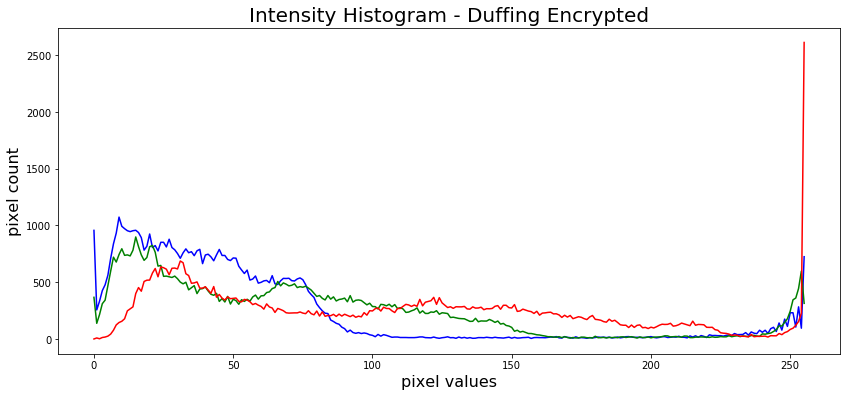

In [15]:
img = cv2.imread("Downloads/img/duffingencrypted1.bmp",1) 
pil_im = Image.open("Downloads/img/duffingencrypted1.bmp", 'r')
imshow(np.asarray(pil_im))

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red') 
plt.title('Intensity Histogram - Duffing Encrypted', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

In [16]:
#DECRYPTION PROCESS:

#2-D Duffing map



im = Image.open("Downloads/img/duffingencrypted1.bmp")  # Can be many different formats.
pix = im.load()
m= im.size[0]

In [17]:
image_matrix = []
for width in range(m):
    row = []
    for height in range(m):
        try:
            row.append((pix[width,height]))
        except:
            row=[pix[width, height]]
    try:
        image_matrix.append(row)
    except:
        image_matrix = [row]

In [18]:
#RED PLANE

imagebitwise=[]

for i in range(m):
    for j in range(m):
        queen=returningbinarytuples(image_matrix[i][j][0])
        for k in range (8):
            imagebitwise.append(queen[k])
            
r=[]

for i in range (m*m*8):
    r.append(imagebitwise[i]^h1[i]^h2[i])
len(r)


# GREEN PLANE X
imagebitwise=[]

for i in range(m):
    for j in range(m):
        queen=returningbinarytuples(image_matrix[i][j][1])
        for k in range (8):
            imagebitwise.append(queen[k])
            
g=[]

for i in range (m*m*8):
    g.append(imagebitwise[i]^h1[i]^h2[i])
len(g)


#BLUE PLANE X

imagebitwise=[]

for i in range(m):
    for j in range(m):
        queen=returningbinarytuples(image_matrix[i][j][1])
        for k in range (8):
            imagebitwise.append(queen[k])
            
b=[]

for i in range (m*m*8):
    b.append(imagebitwise[i]^h1[i]^h2[i])

len(b)

500000

In [19]:
r=np.reshape(r,(m*m,8))
g=np.reshape(g,(m*m,8))
b=np.reshape(b,(m*m,8))

decrypted1=[]
decryprow=[]
for i in range(1,(m*m)+1):
    try:
        r1=dec(r[i-1])
        g1=dec(g[i-1])
        b1=dec(b[i-1])
        decryprow.append((r1,g1,b1))
        if(i%m==0):
            decrypted1.append(decryprow)
            decryprow=[]
        
    except:
       ;

In [20]:
img2 = image_matrix

#for j in range(750):
 #   for x in range(m):
  #      for y in range(m):

   #         img2[x][y] = decrypted1[(x+y)%m][(x+2*y)%m]

In [21]:
im5 = Image.new("L", (m, m))
rgb_im = im5.convert('RGBA')
pix = rgb_im.load()

for x in range(m):
    for y in range(m):
        pix[x, y] = img2[x][y]
rgb_im.save("duffingdecrypted1.bmp", "BMP")